# The overview of available camera time series

In [230]:
%matplotlib inline

import matplotlib
matplotlib.rcParams.update({'font.size': 20})
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)
from matplotlib.pyplot import cm 
from IPython.display import Image, display, HTML
#import grass.script as gscript
import matplotlib.dates as mdates
import matplotlib.image as mpimg
import pandas as pd
import calmap

In [34]:
cameras = [1217, 1239, 1290, 1323, 1627, 1637, 2765, 3425, 3451, 3548, 3760, 4170, 4663, 4731, 5363, 5599, 5652, 5751, 7271, 8794, 8883, 9106, 9266, 9413, 9706, 9713, 9955, 10823, 10838, 14252, 14330, 14519, 17603, 18921, 23528, 23965, 23966, 23970, 24278]


In [242]:
def overview(camera):
    cmaps = {'people': 'YlGn', 'vehicles': 'Reds', 'bikes': 'Blues'}
    #plt.cm.set_clim(vmin=None, vmax=None)
    path = '/home/anna/Documents/Projects/Hipp_STC/filtering/camera_{}_points.csv'.format(camera)
    dateparse = lambda year, month, day, hour, minute: pd.Timestamp('%s-%s-%s %s:%s' % (year, month, day, hour, minute))
    data = pd.read_csv(path, parse_dates={'datetime': ['year', 'month', 'day', 'hour', 'minute']}, date_parser=dateparse)
    
    # display images from multiple years if available
    table = '<table><tr>'
    for y in range(2010, 2016):
        selection = data.loc[data['datetime'].dt.year == y].loc[data['datetime'].dt.hour < 16]
        if selection.empty:
            continue
        table += "<td><img src='{}'></td>".format(selection['url2'].iloc[0])
    table += "</tr></table>"
    display(HTML(table))

    # create calendars
    for each in ('people', 'vehicles', 'bikes'):
        data_types = data.loc[data['type'] == each]
        if data_types.empty:
            continue

        data_types_series = pd.Series(index=data_types['datetime'], data=[1]*len(data_types['datetime']))
        fig, ax=calmap.calendarplot(data_types_series, cmap=cmaps[each], fillcolor='#C2C2C2')
        cb = fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist(), orientation='vertical')
        ax[0].set_title('Camera {}: {}'.format(camera, each))
        plt.show()


""


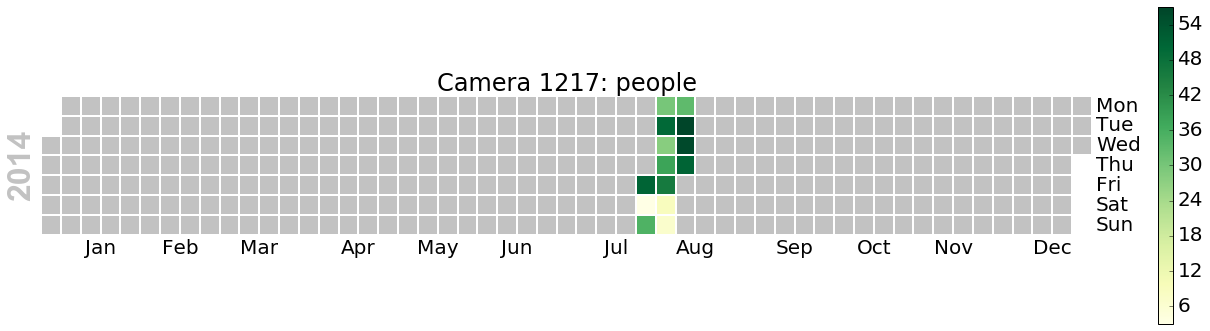

""


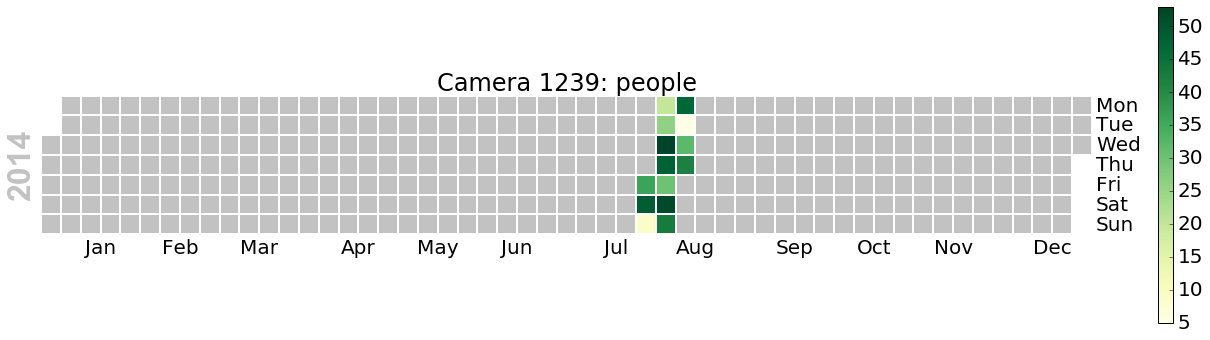

""


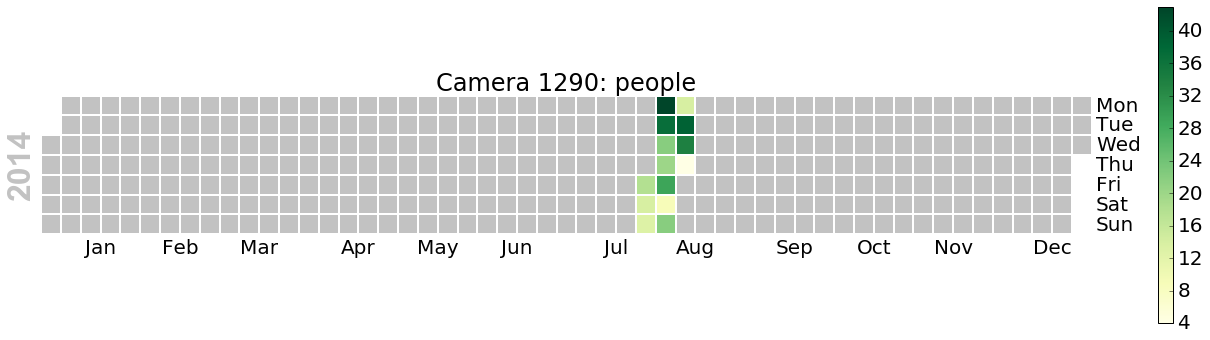

""


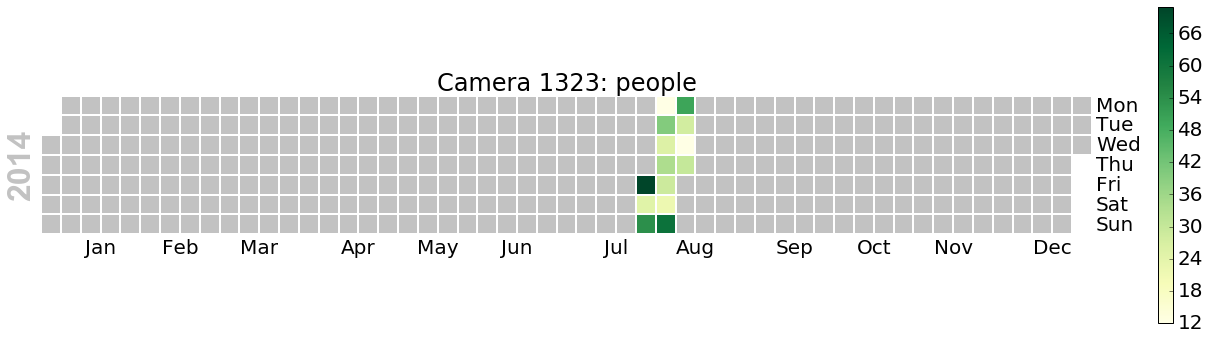

,


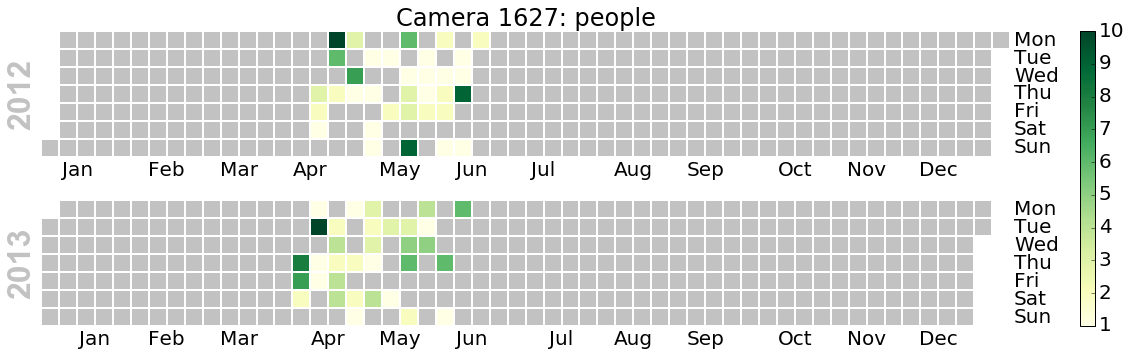

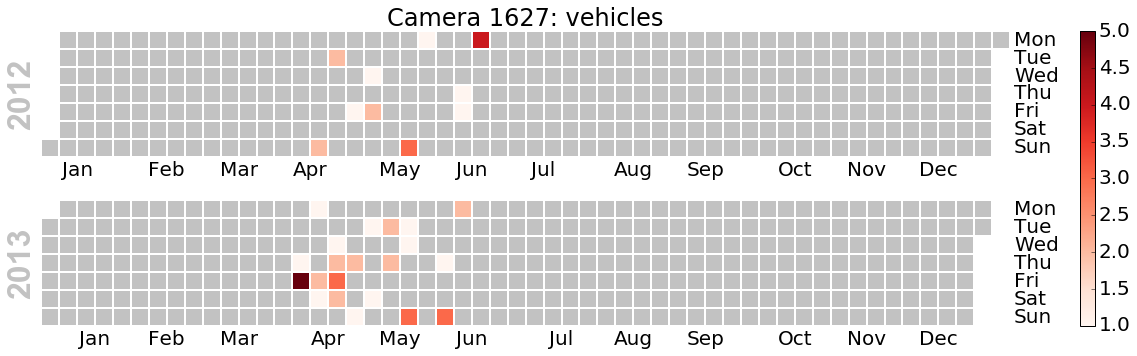

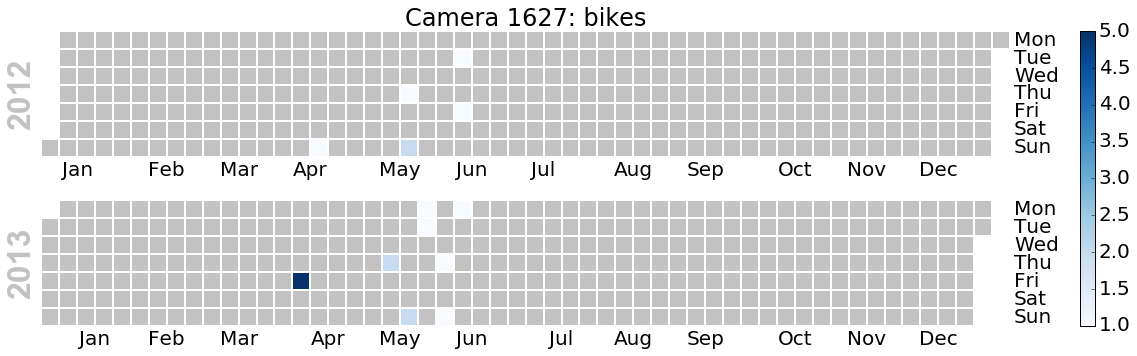

""


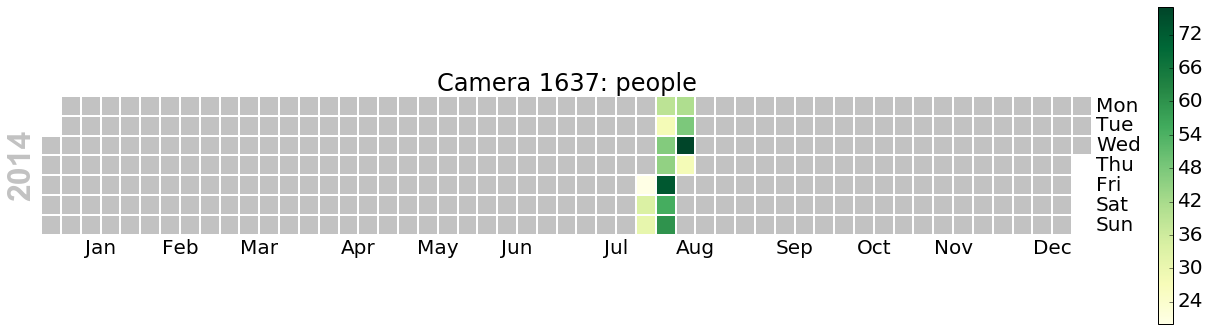

,


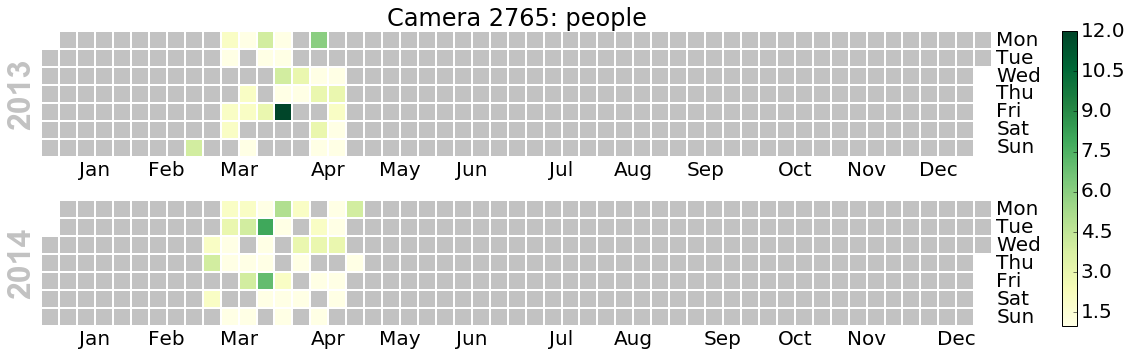

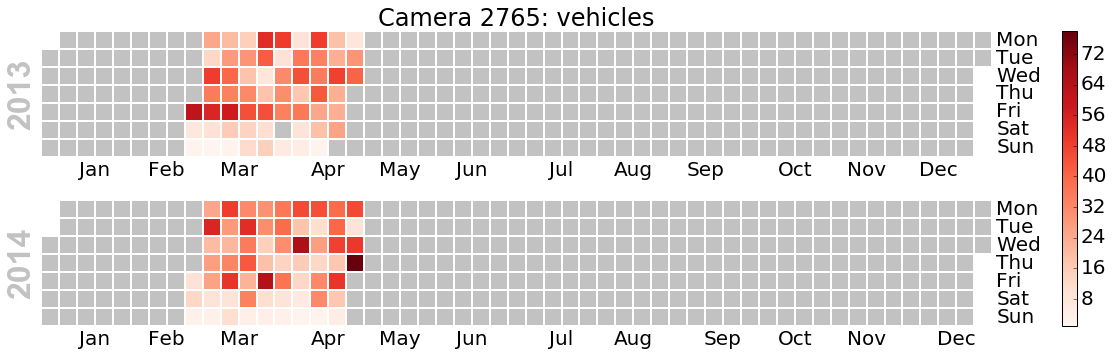

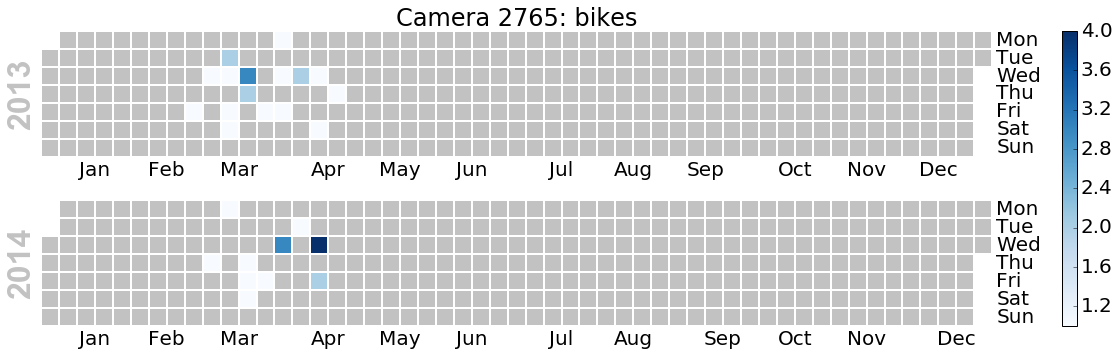

,


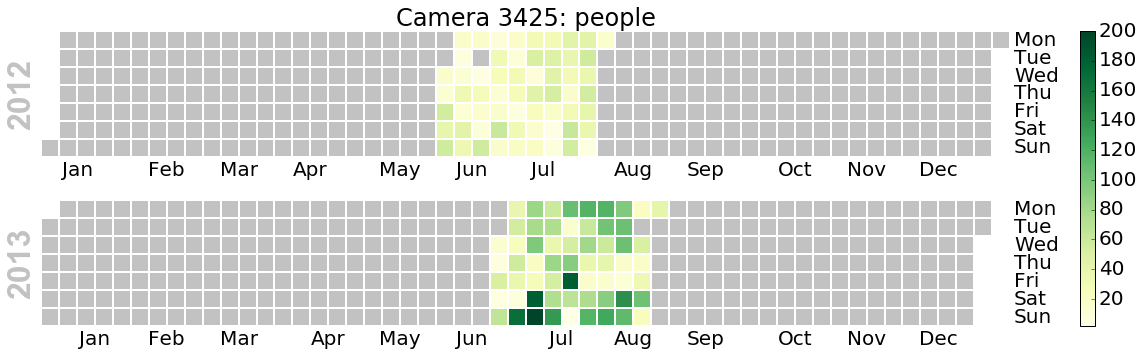

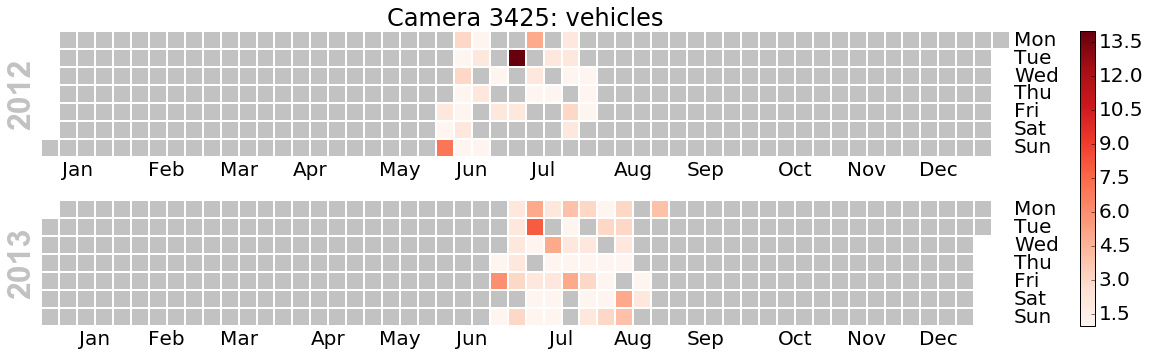

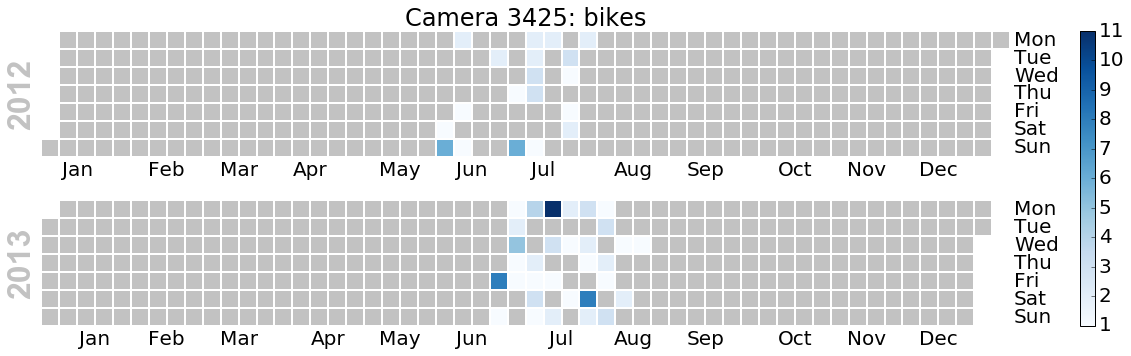

,


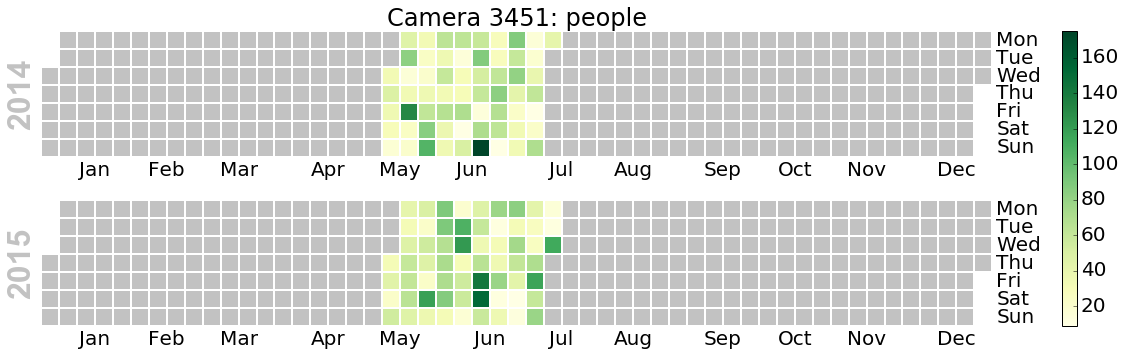

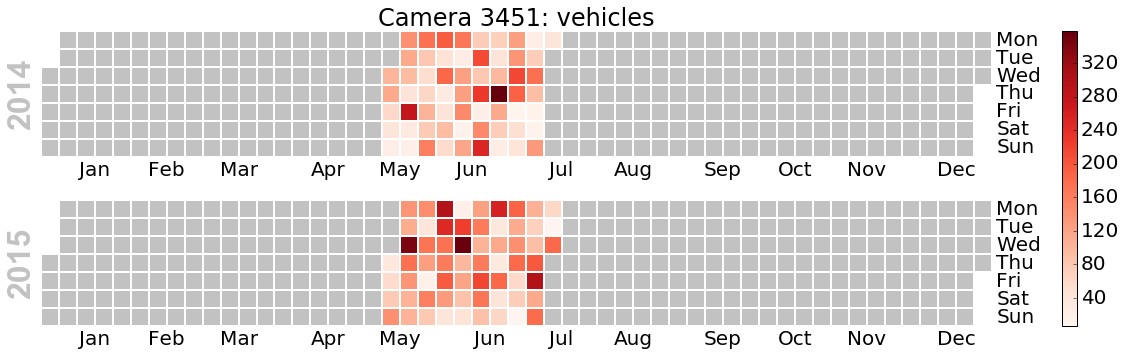

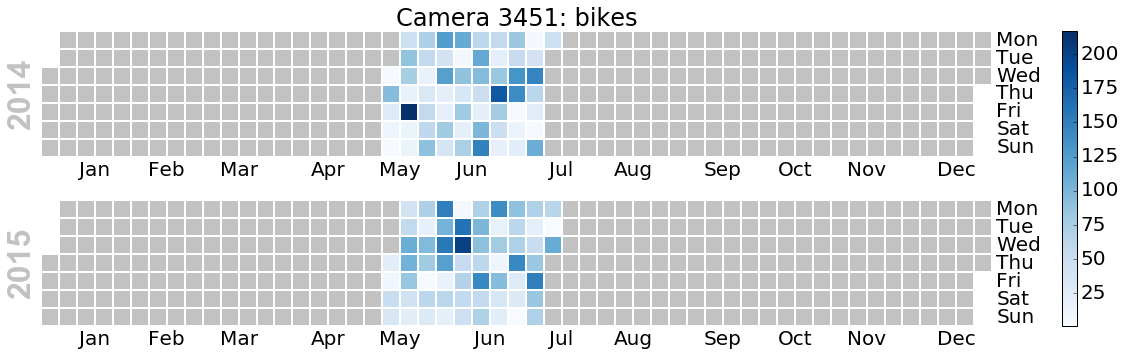

""


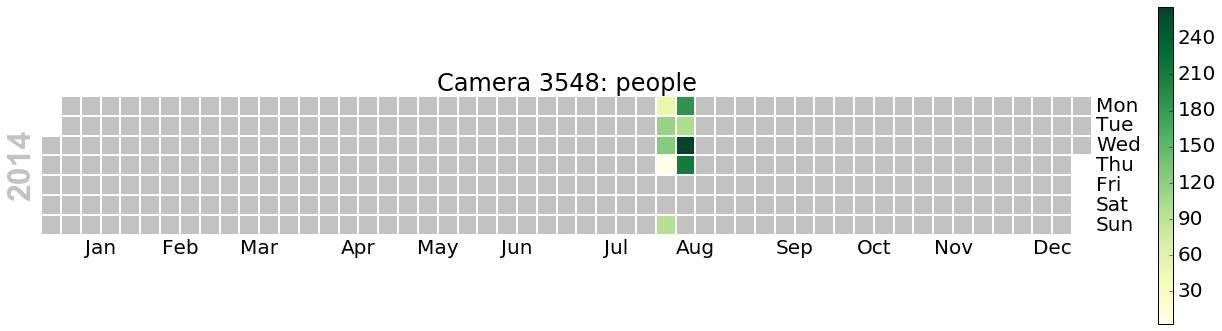

,


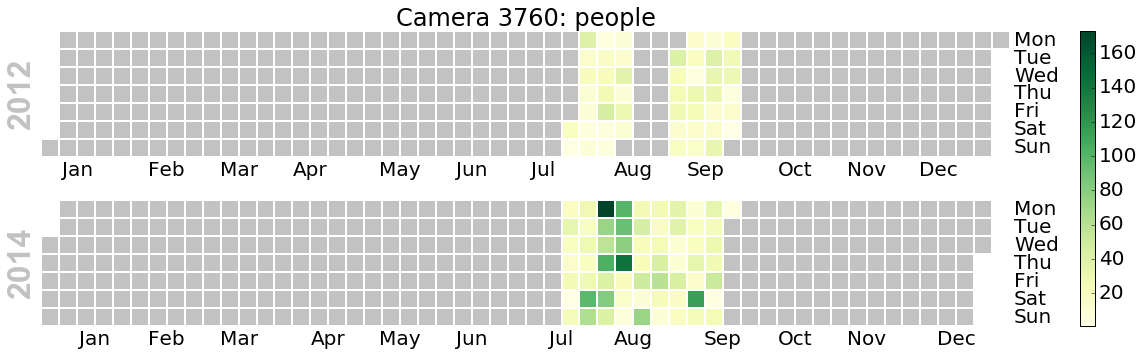

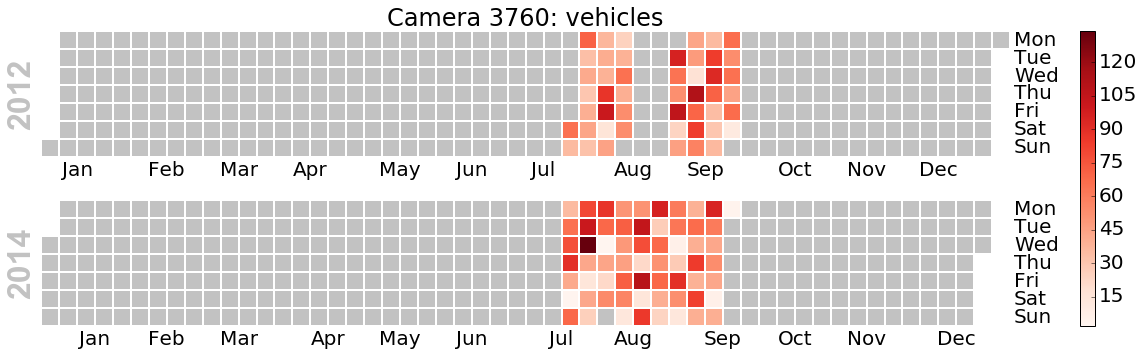

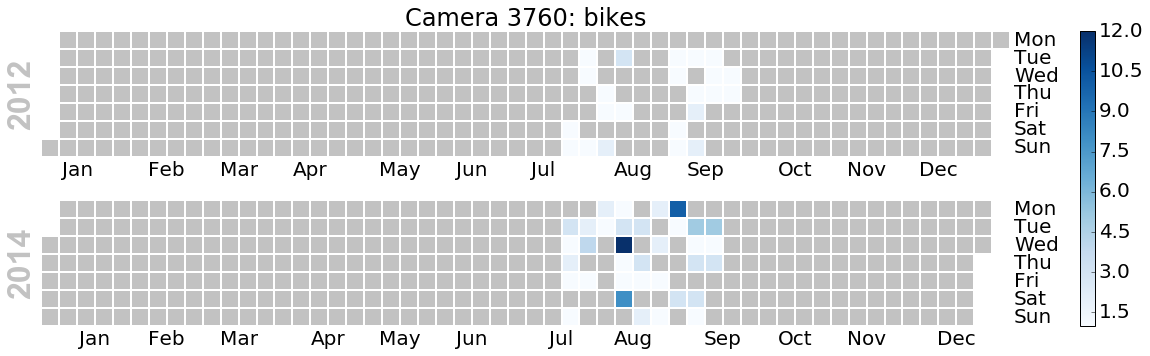

""


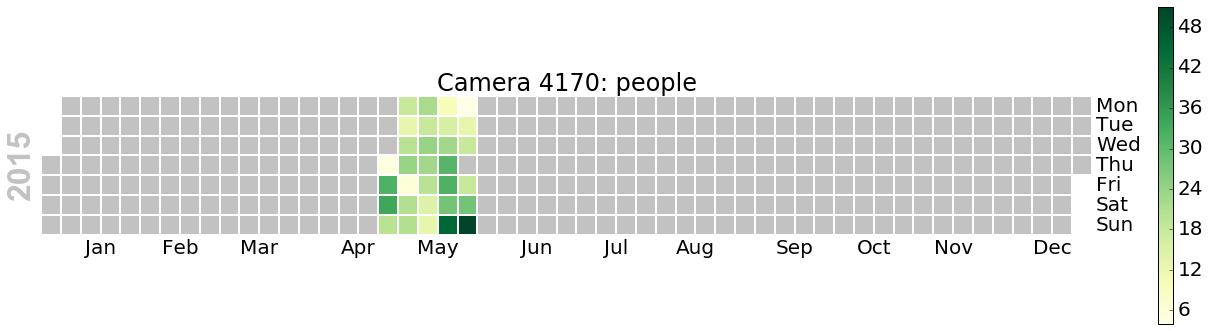

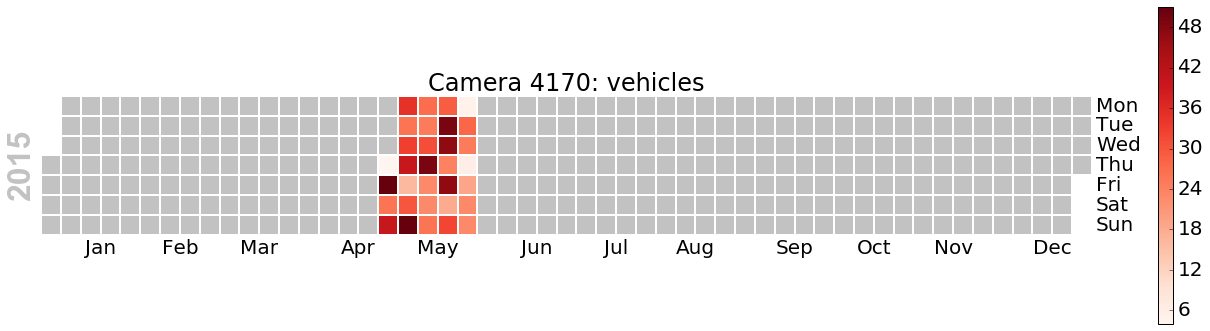

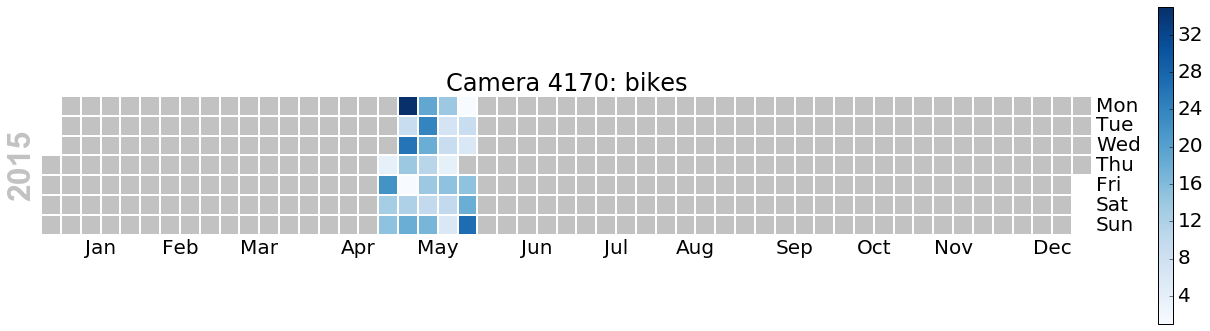

""


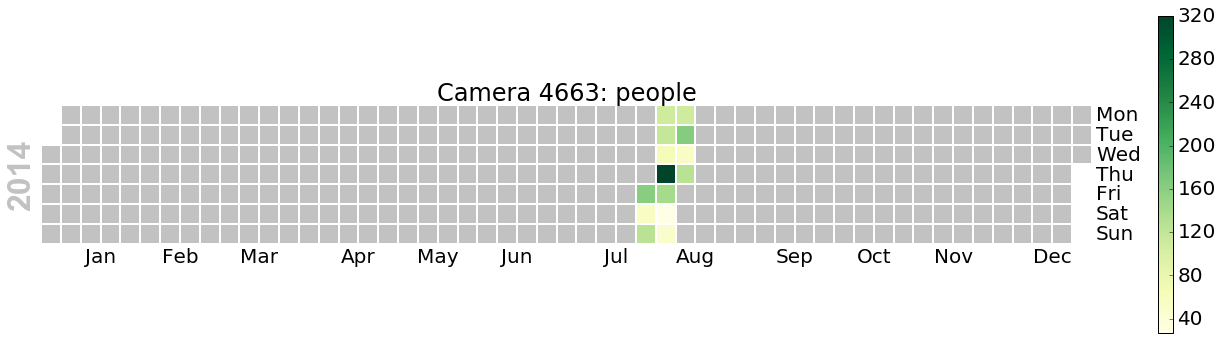

""


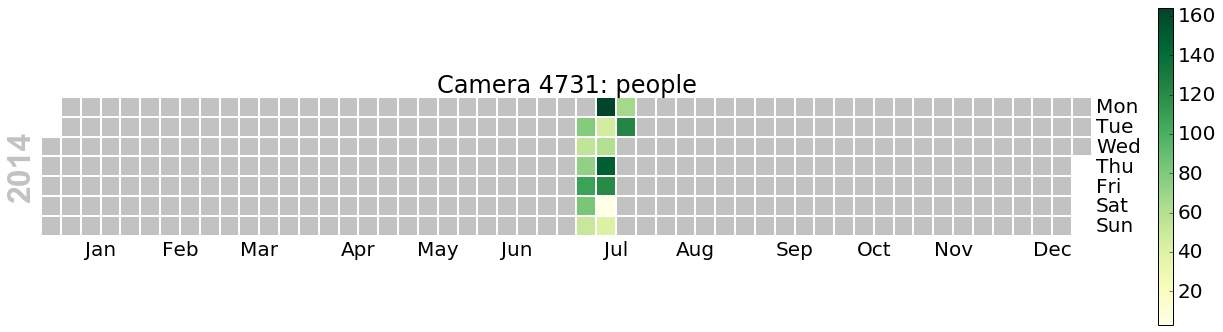

""


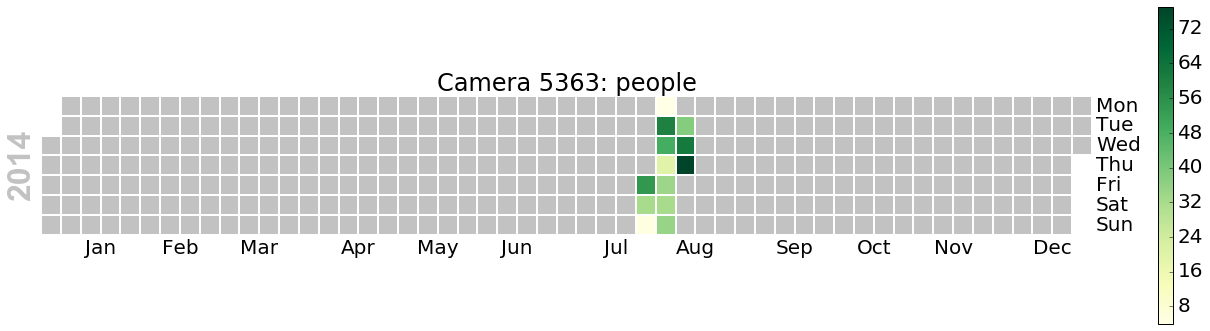

,


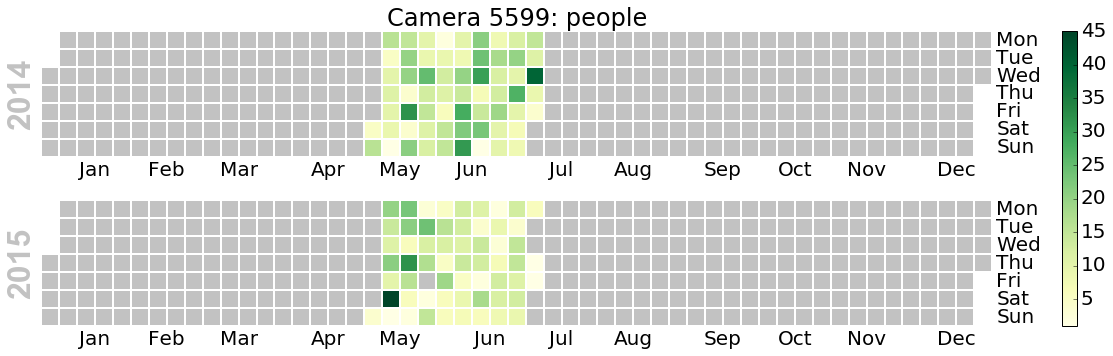

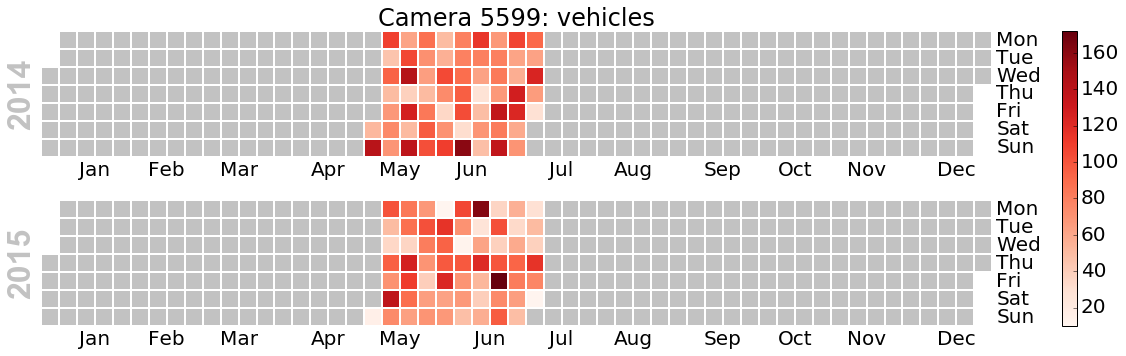

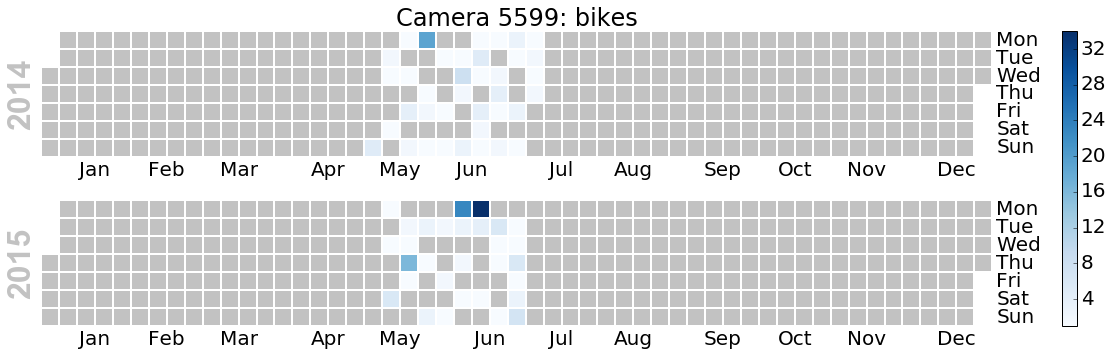

,


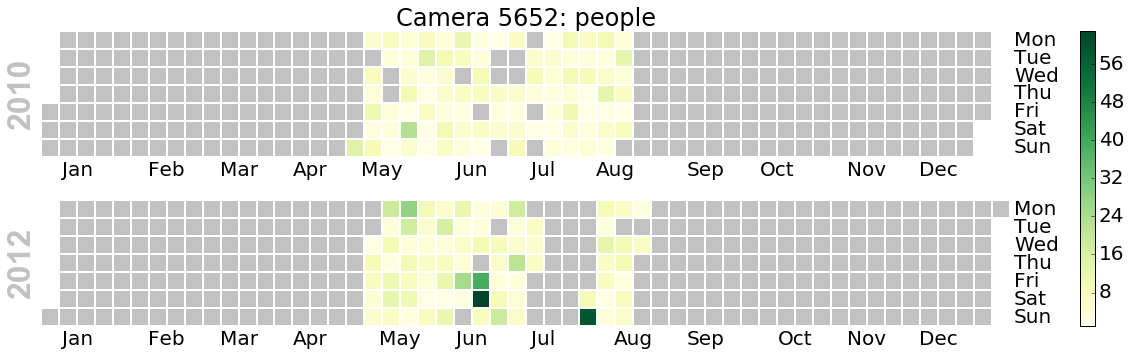

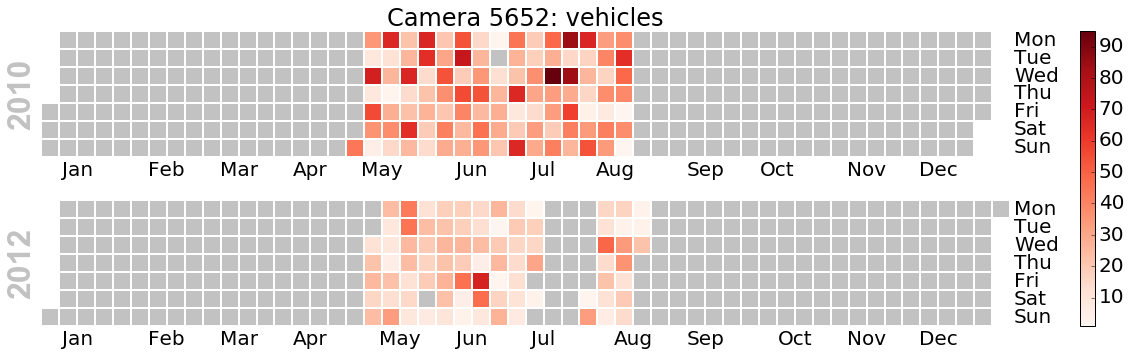

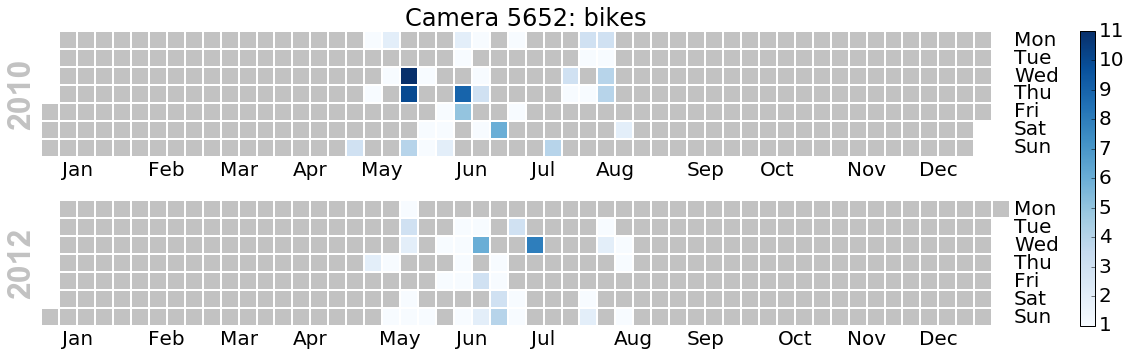

,


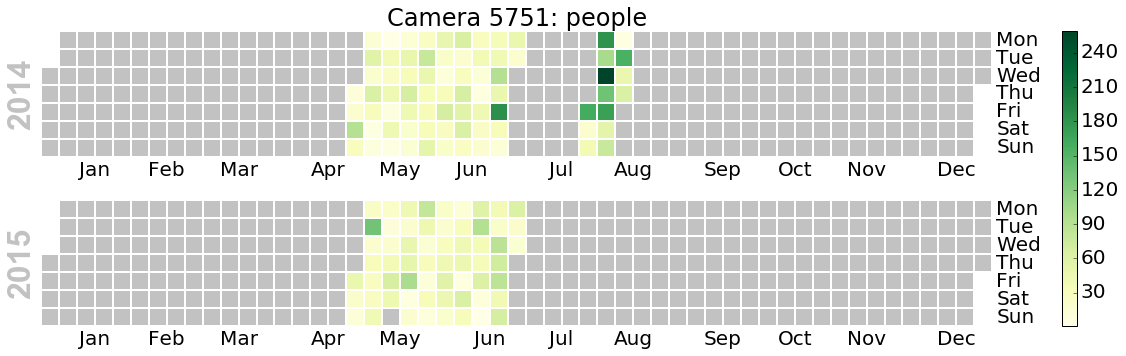

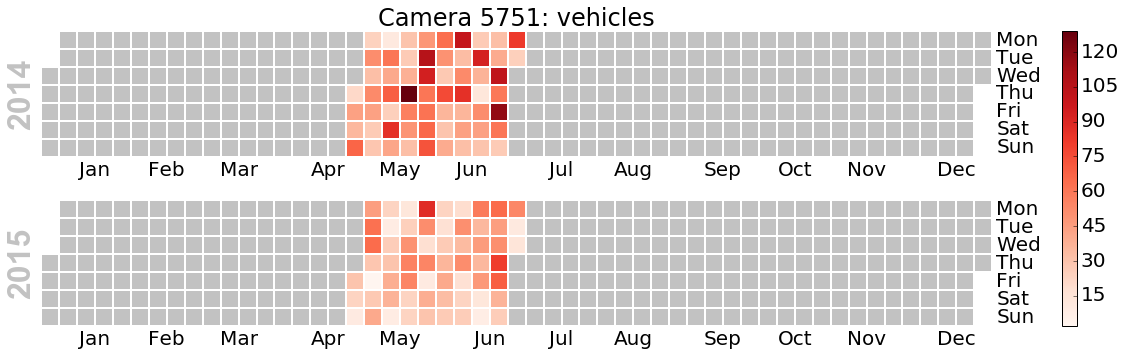

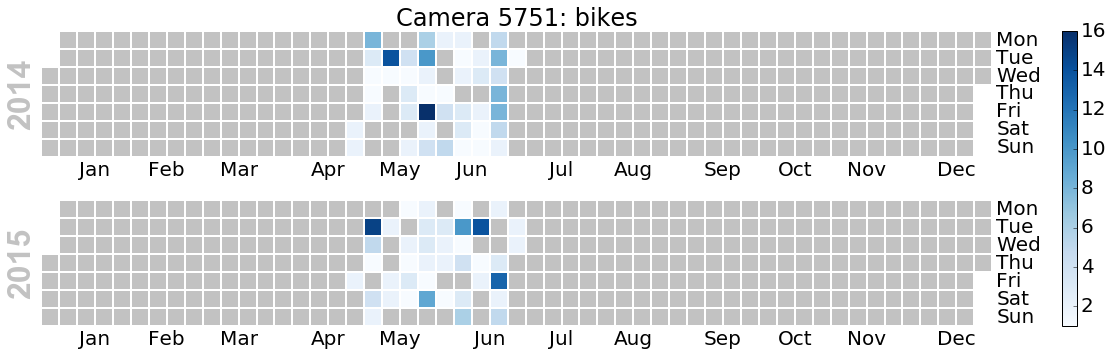

""


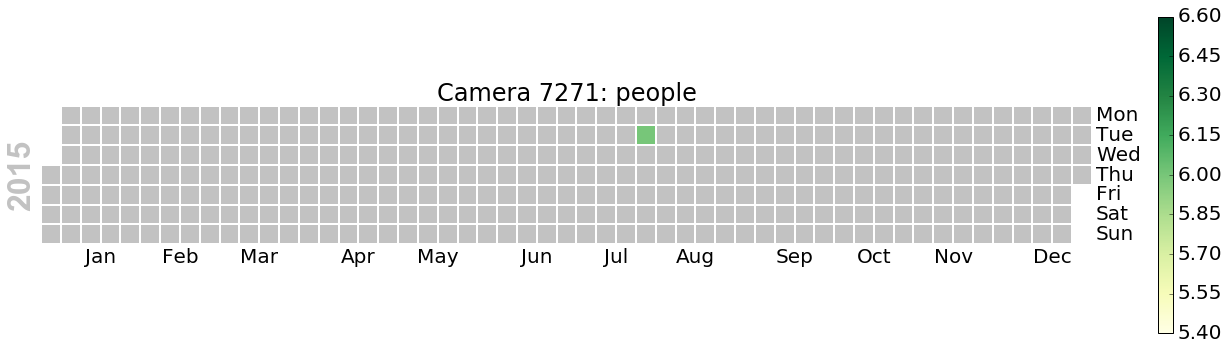

""


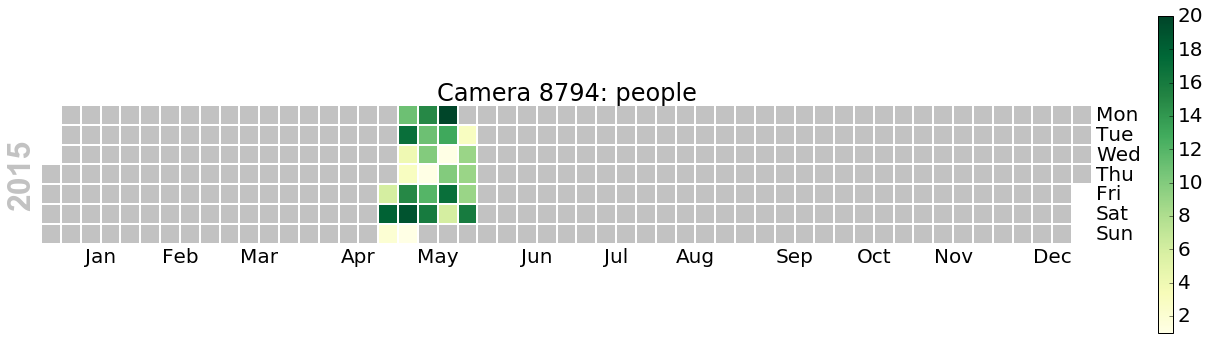

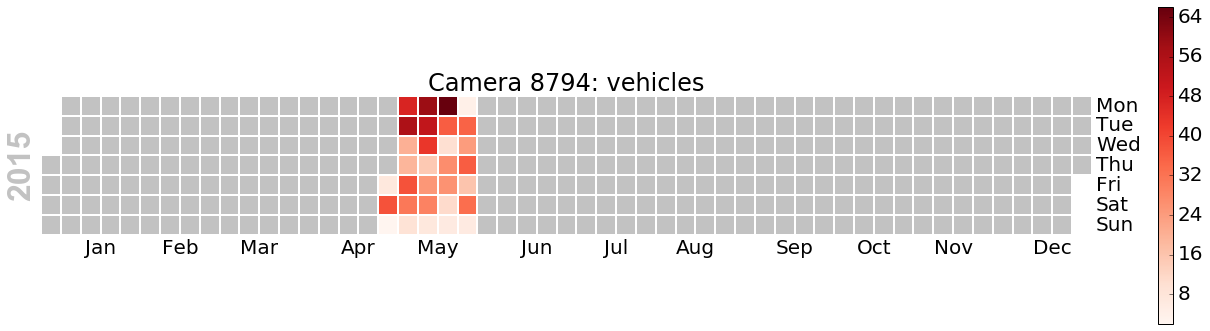

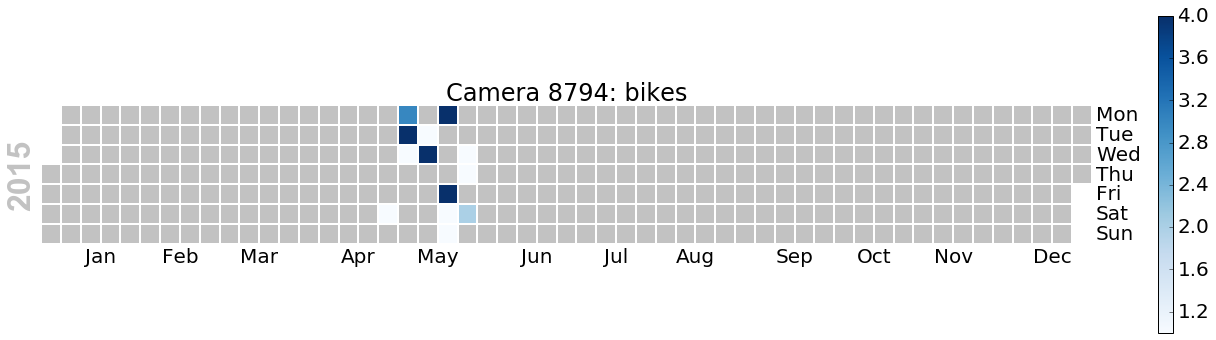

,


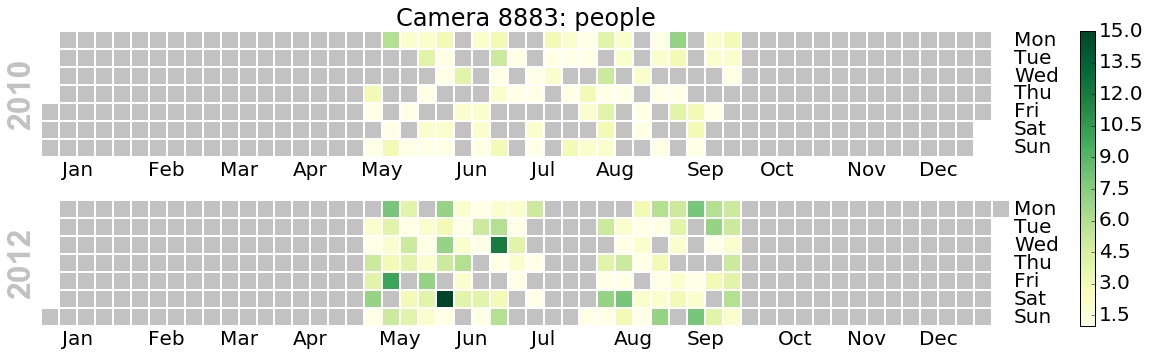

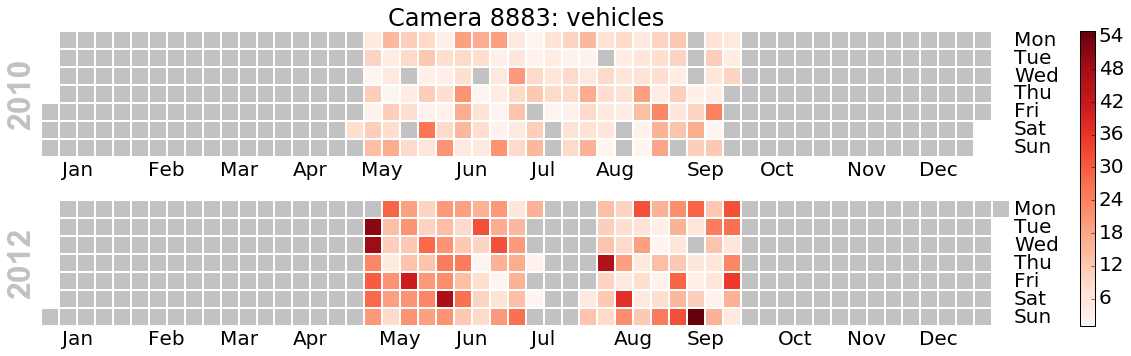

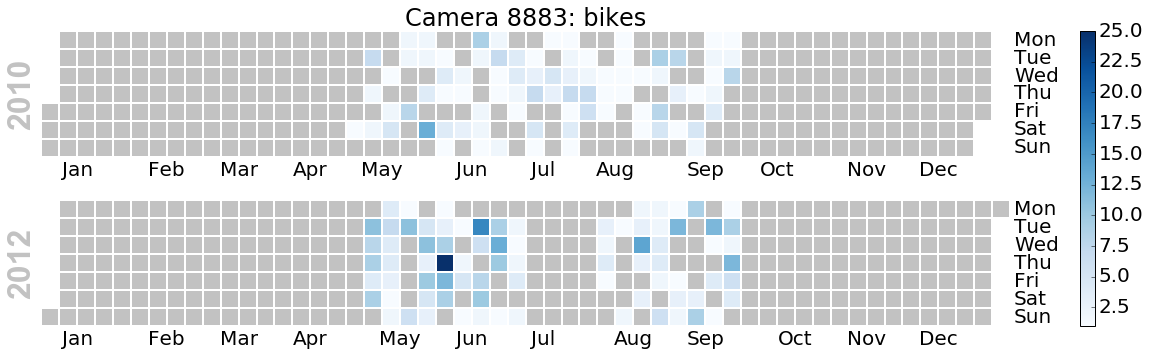

,


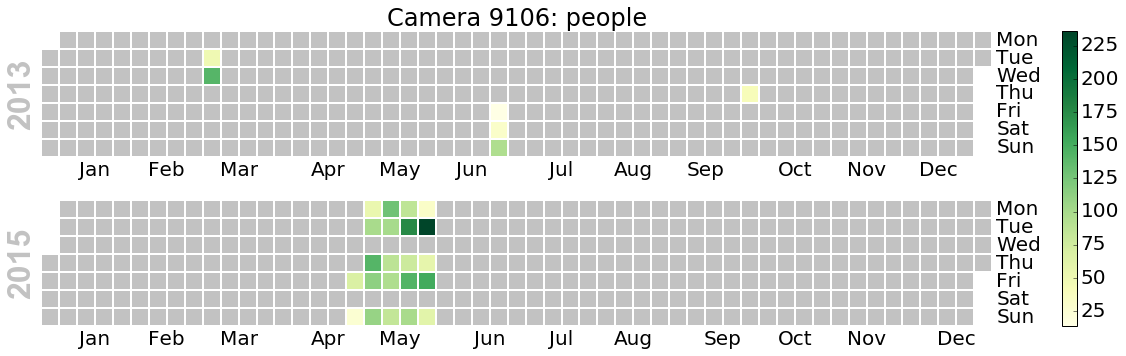

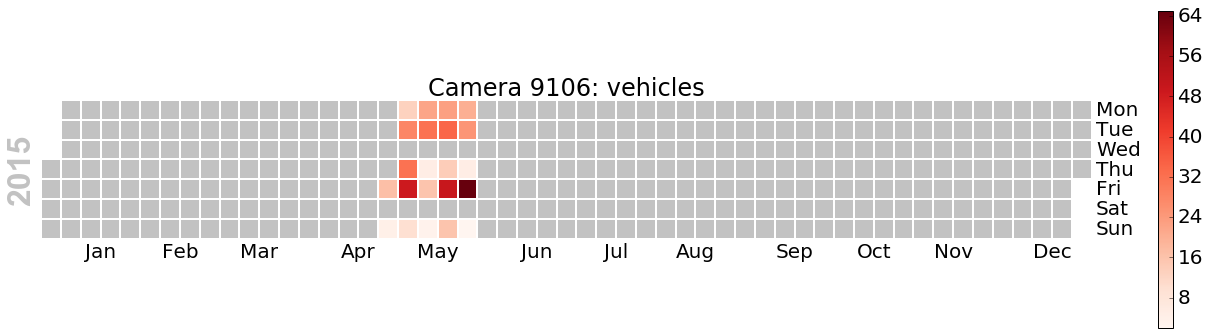

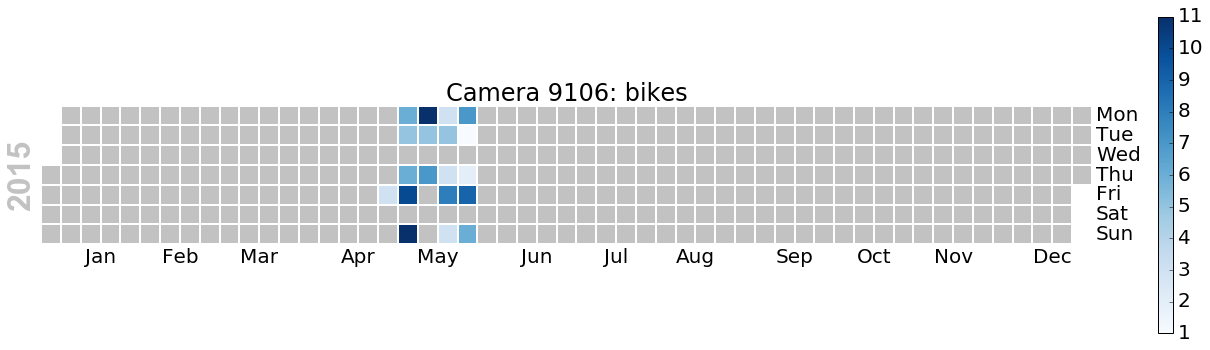

""


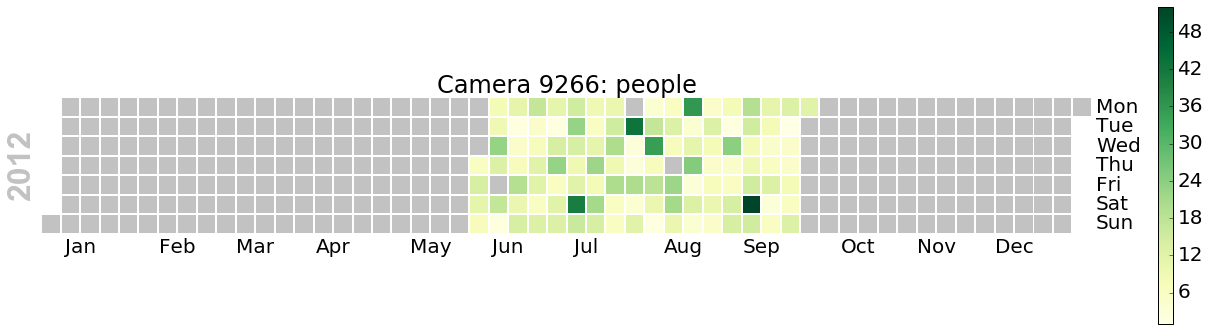

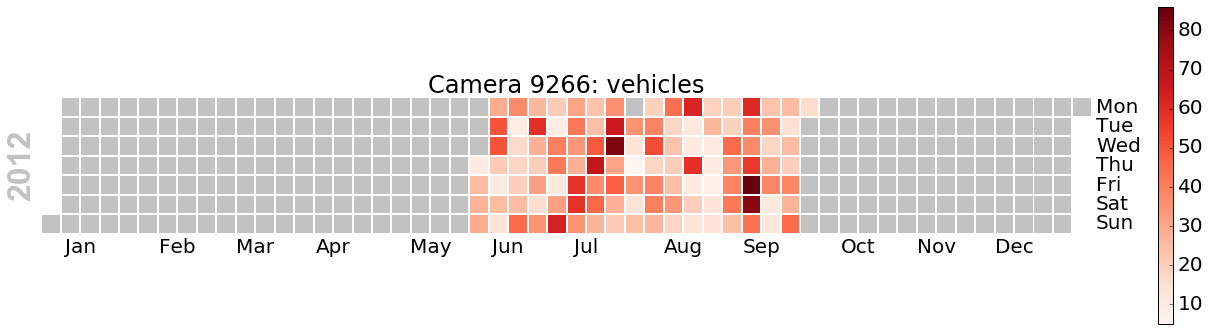

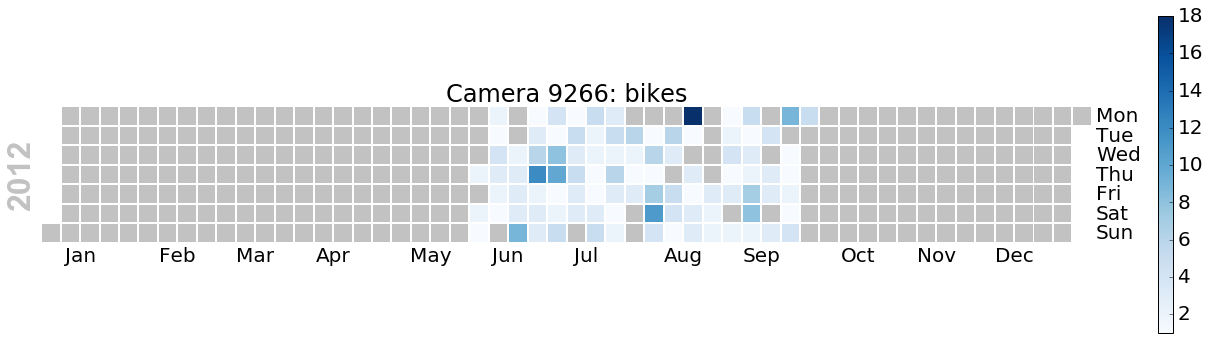

,


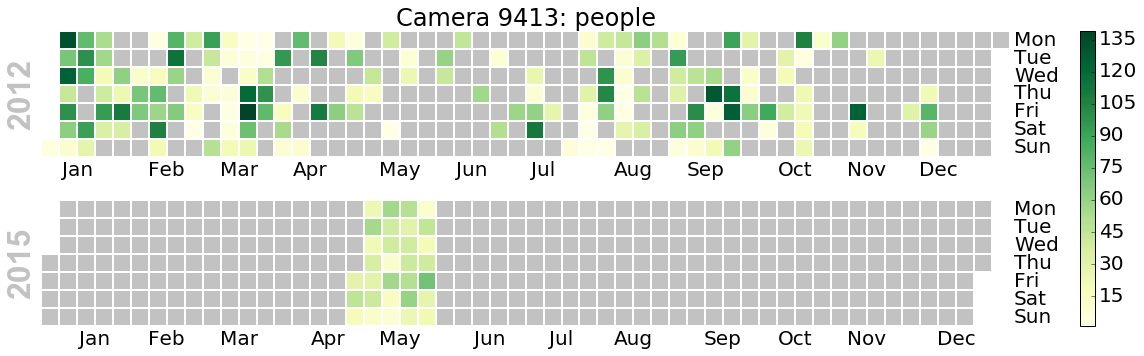

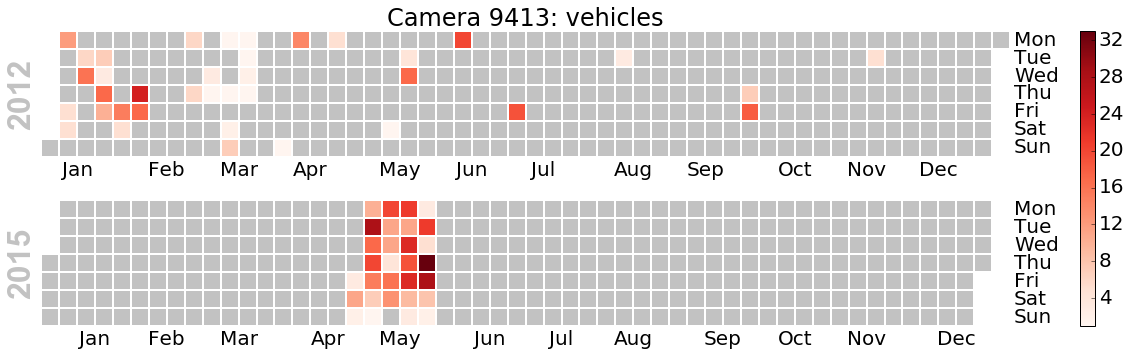

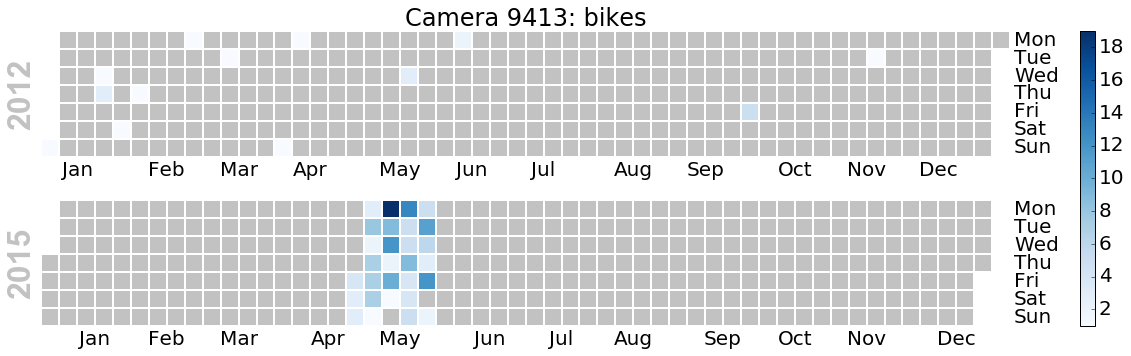

""


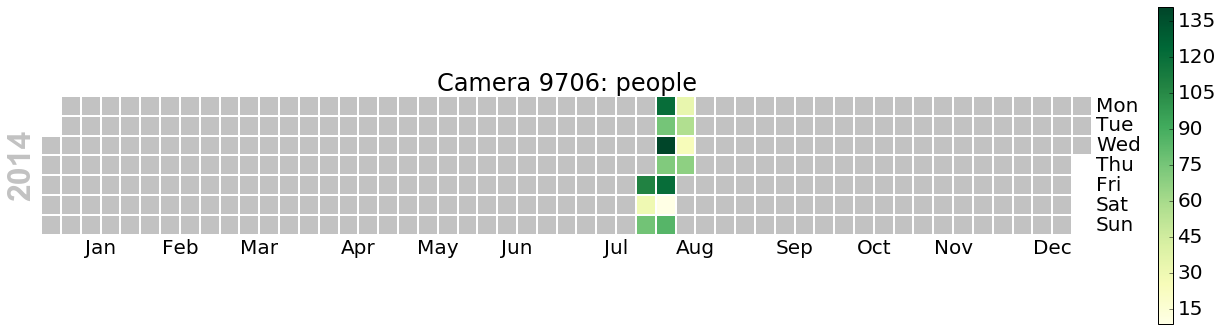

""


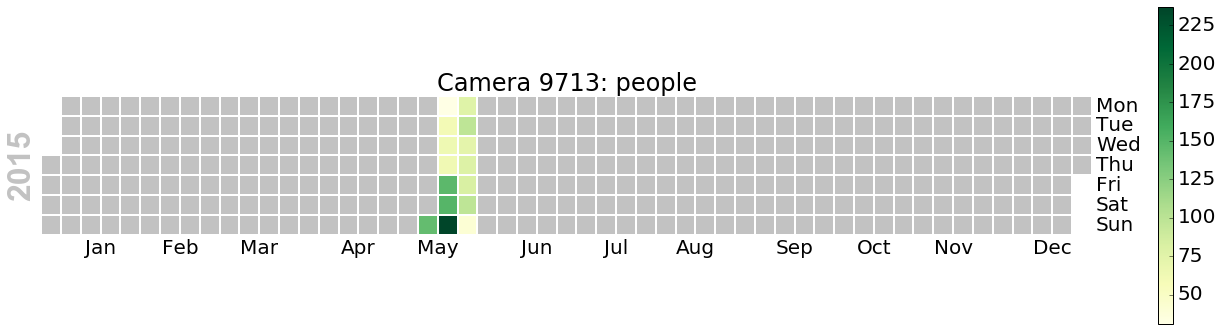

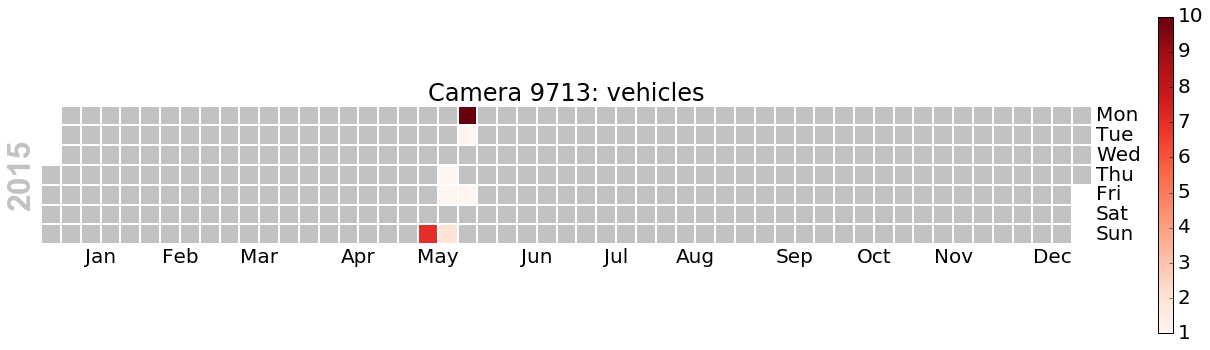

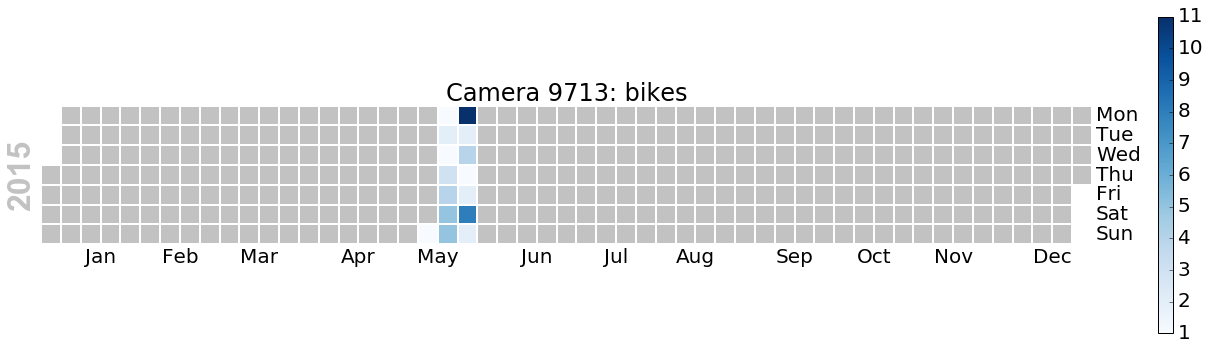

""


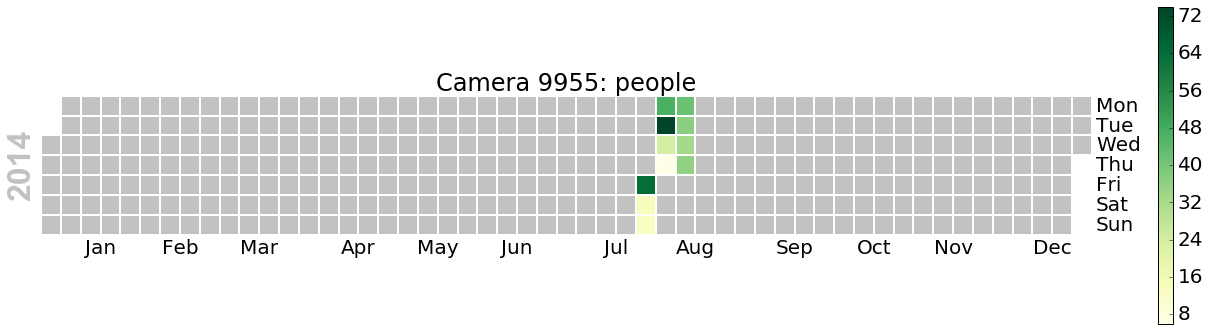

""


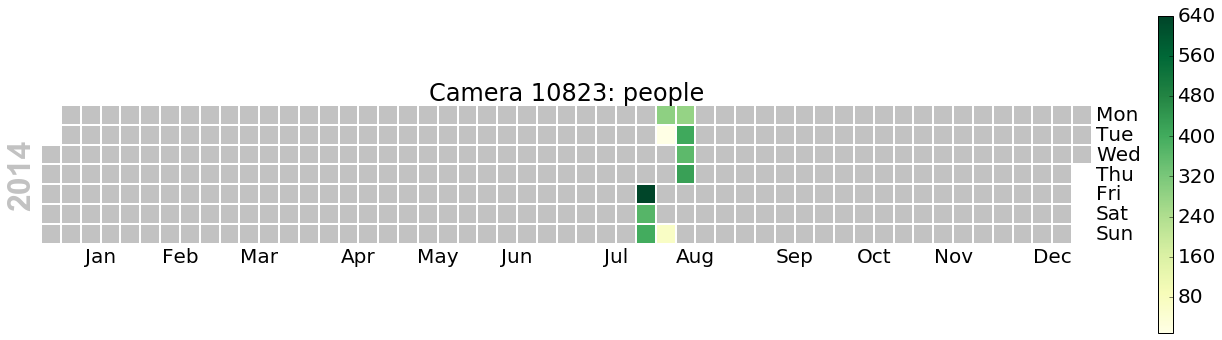

""


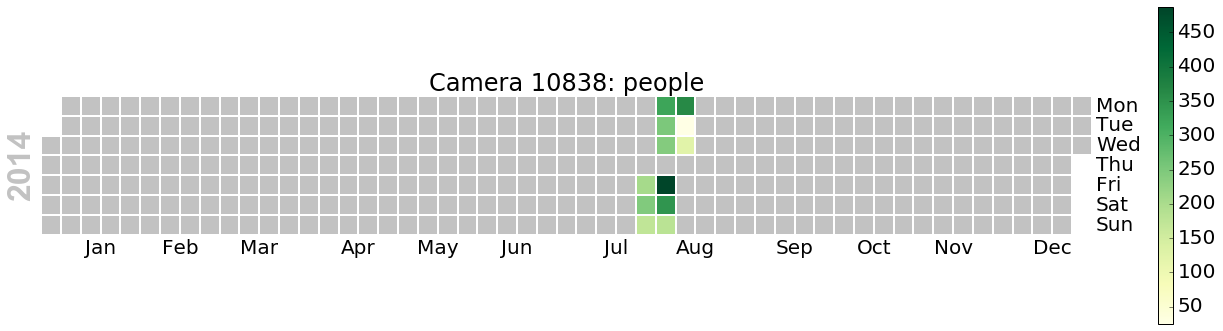

""


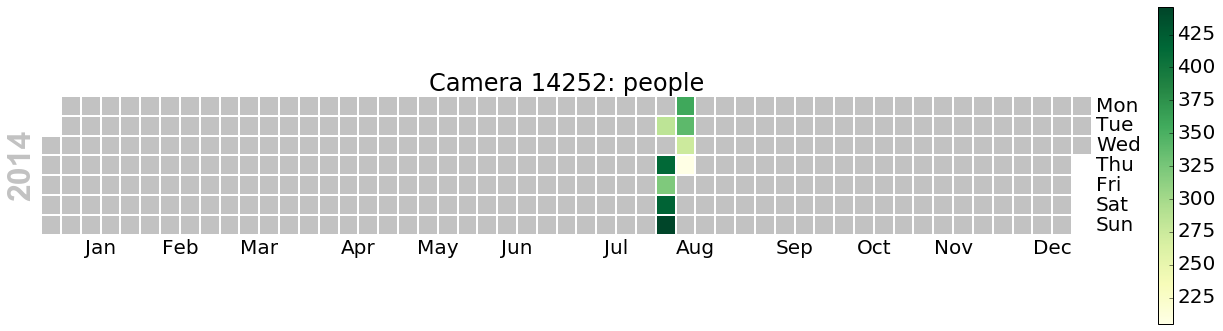

""


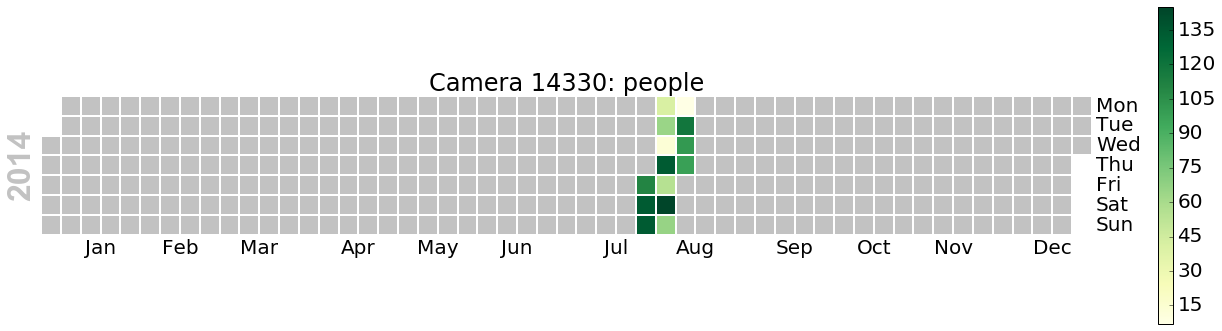

,


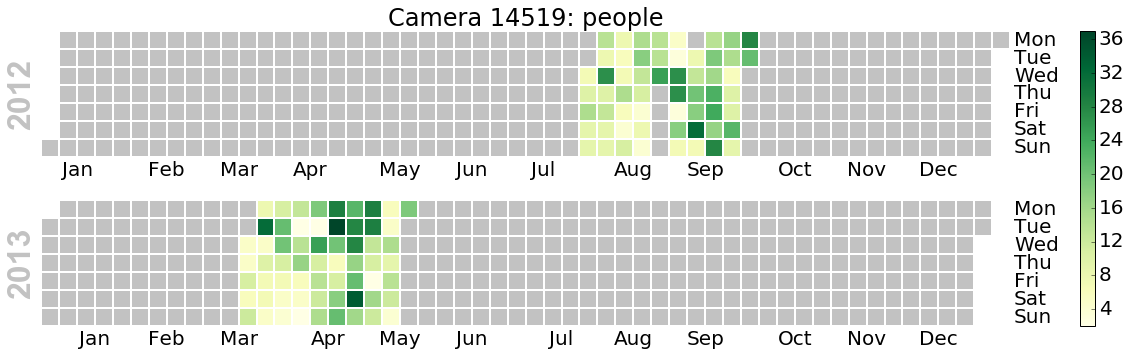

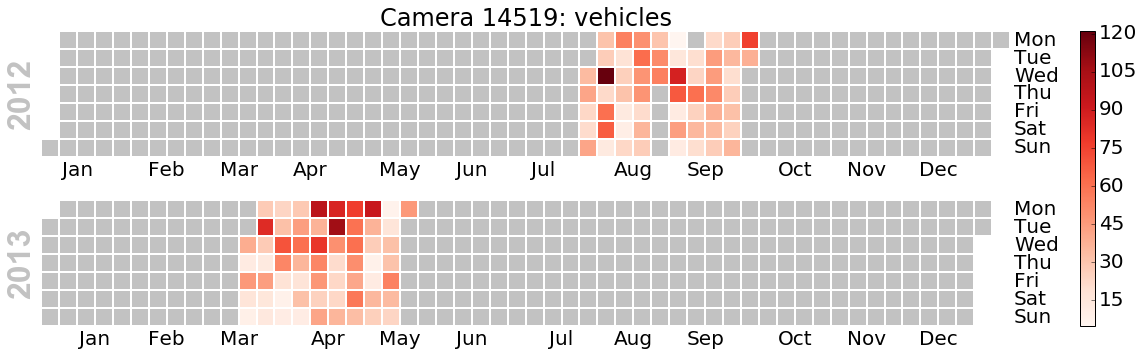

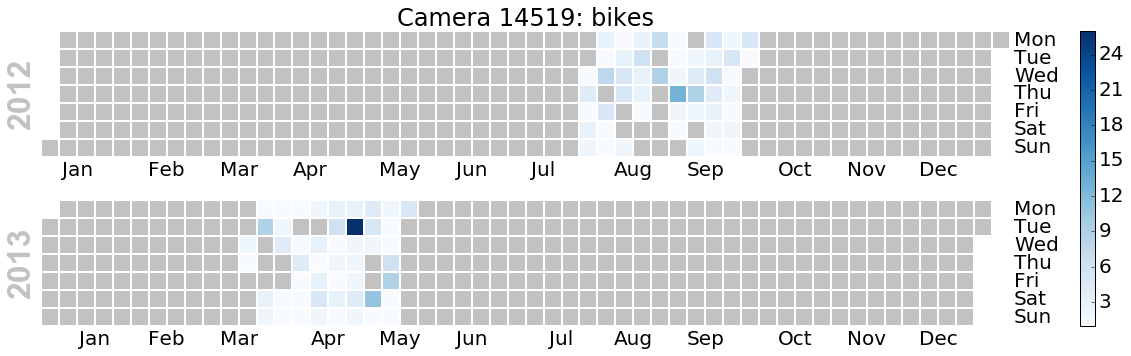

""


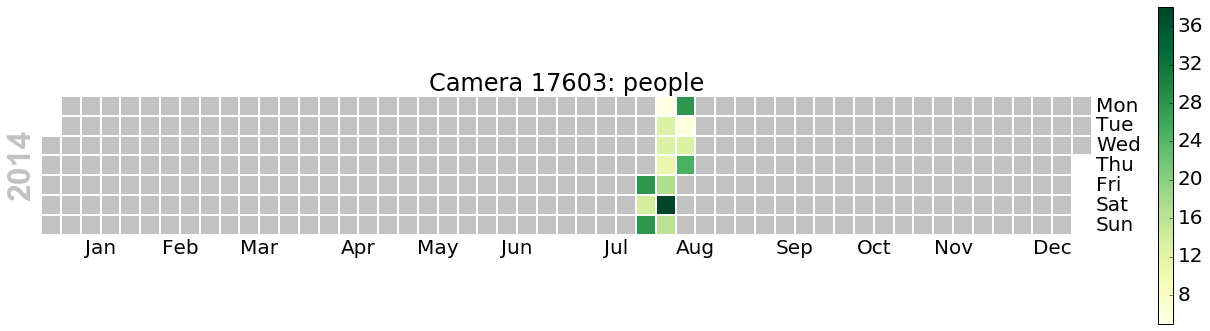

""


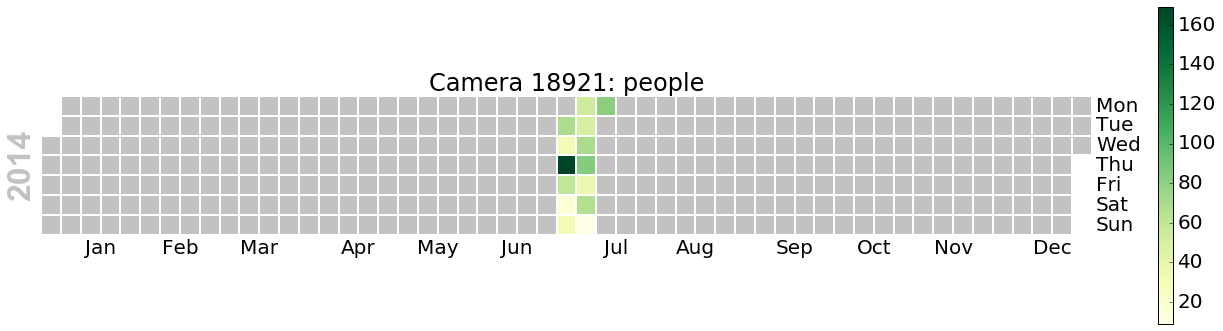

""


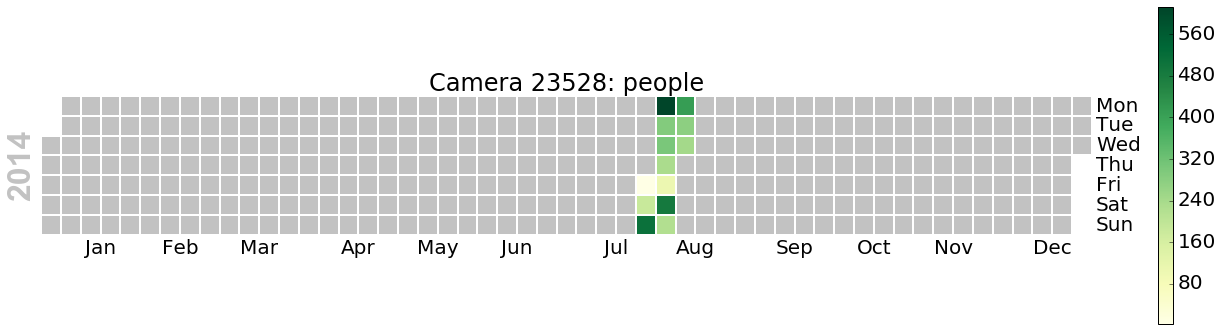

""


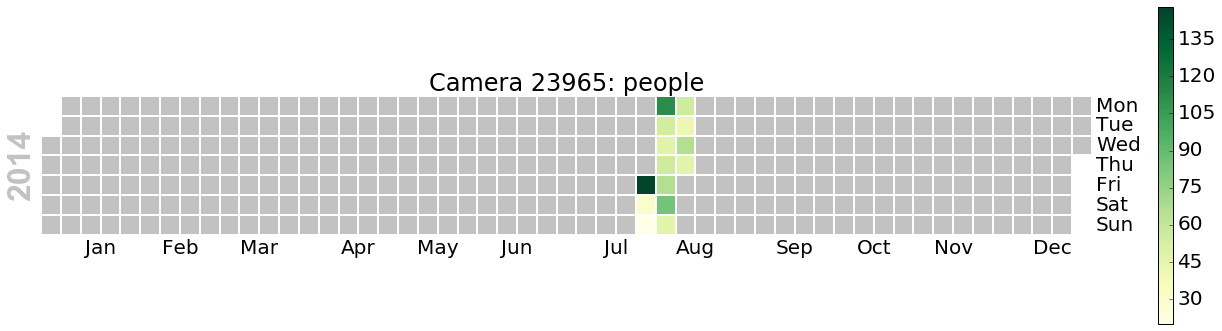

""


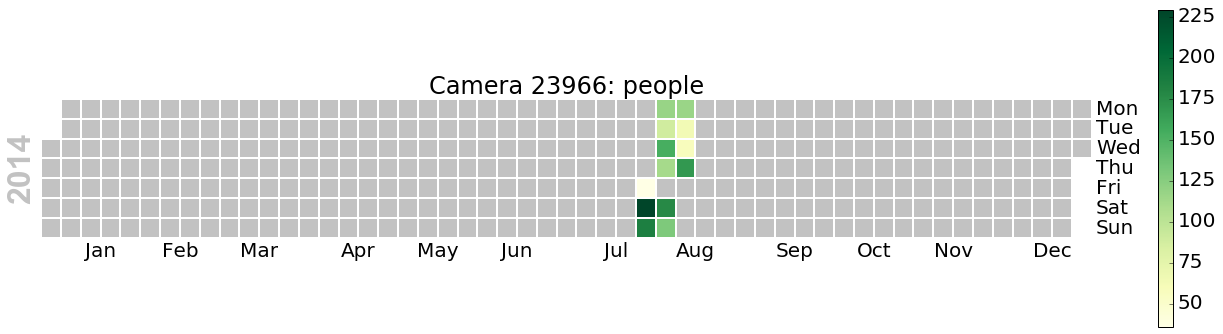

""


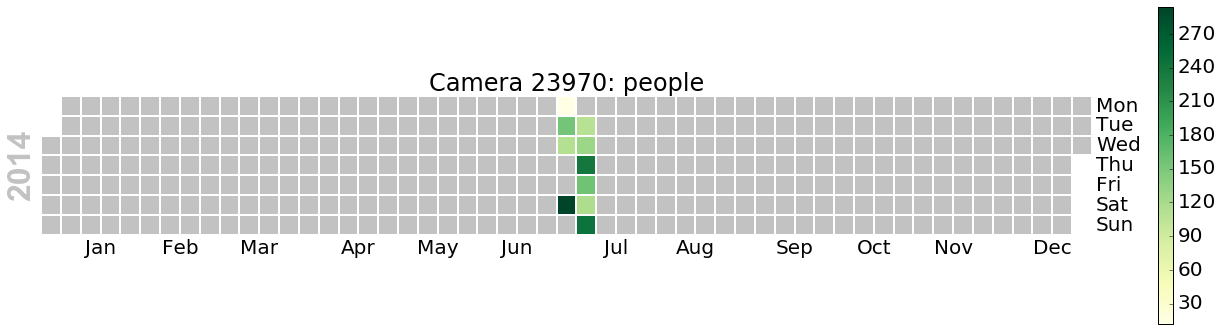

""


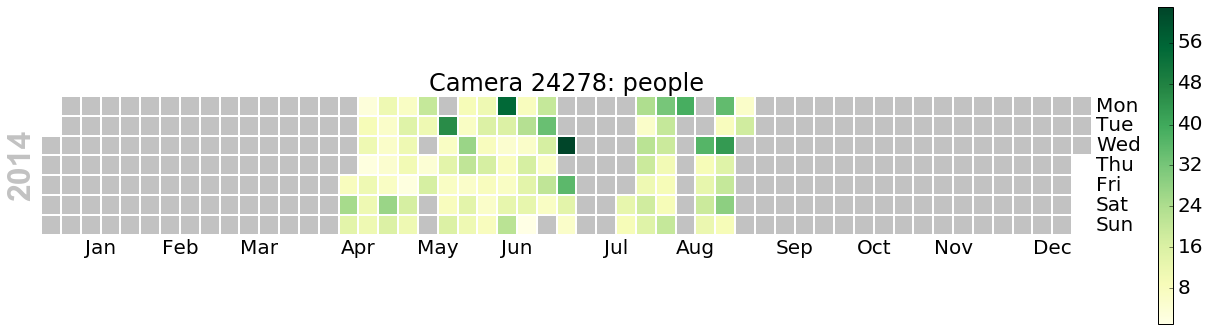

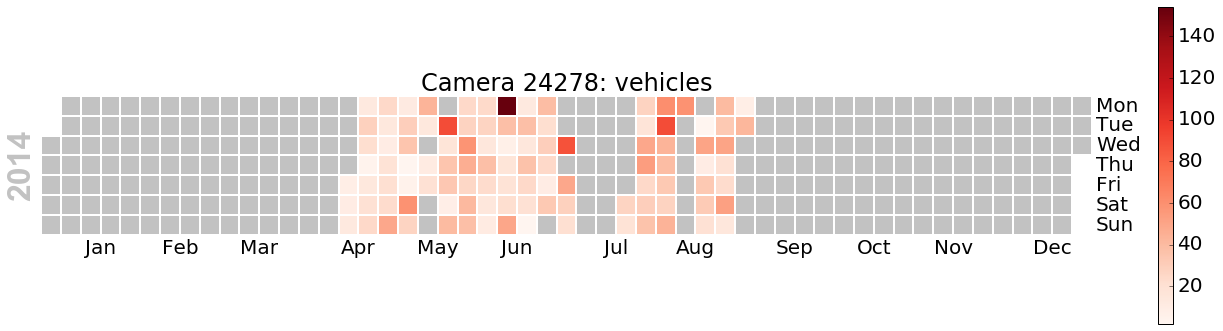

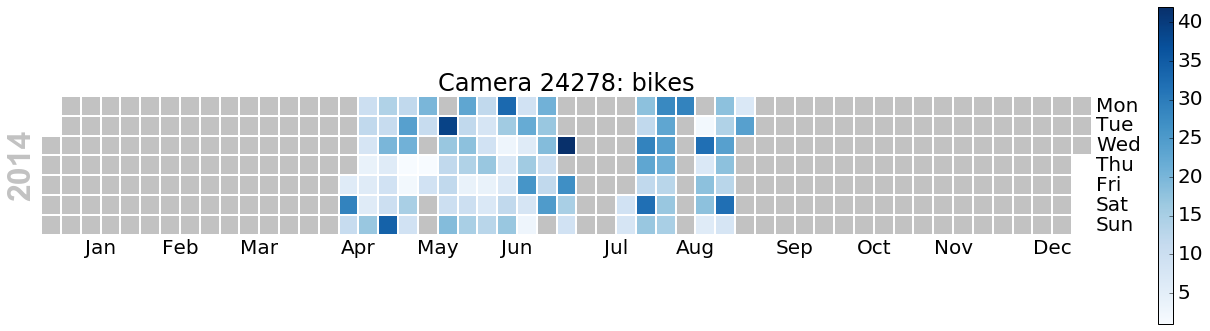

In [241]:
for each in cameras:
    overview(each)